<a href="https://colab.research.google.com/github/Luishdz1050/2077483-Hernandez-Gonzalez/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dayra Lia Herrera Ramirez 1854655
#Luis Roberto Hernandez Gonzalez 2077483

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datos, metadatos = tfds.load ("cats_vs_dogs", as_supervised=True, with_info=True)



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.Q9WJAW_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmpbhc3bhbhtfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

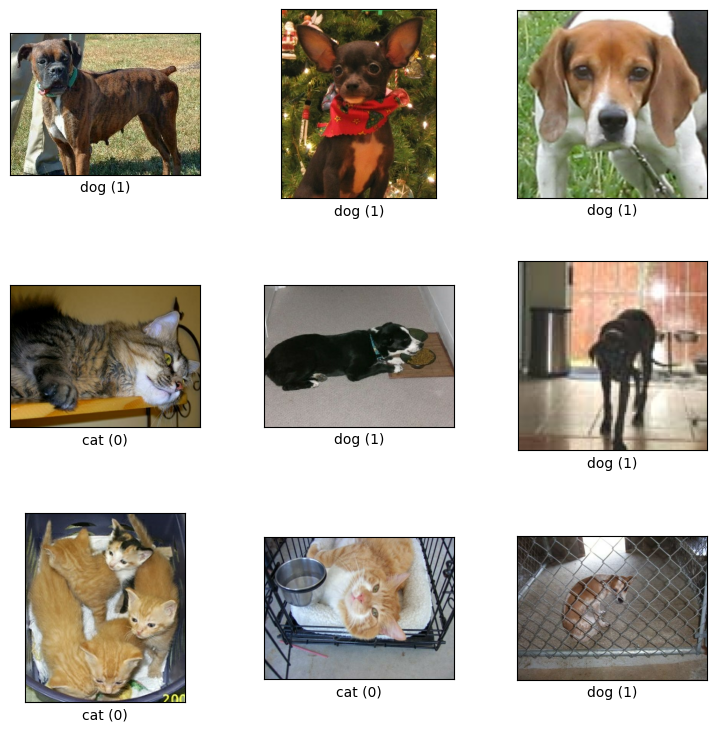

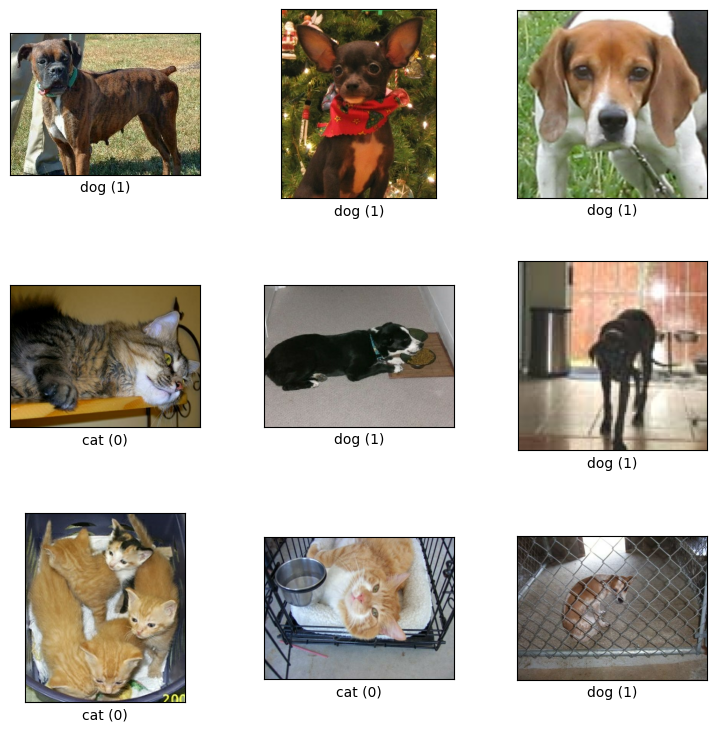

In [ ]:
tfds.show_examples(datos["train"], metadatos)

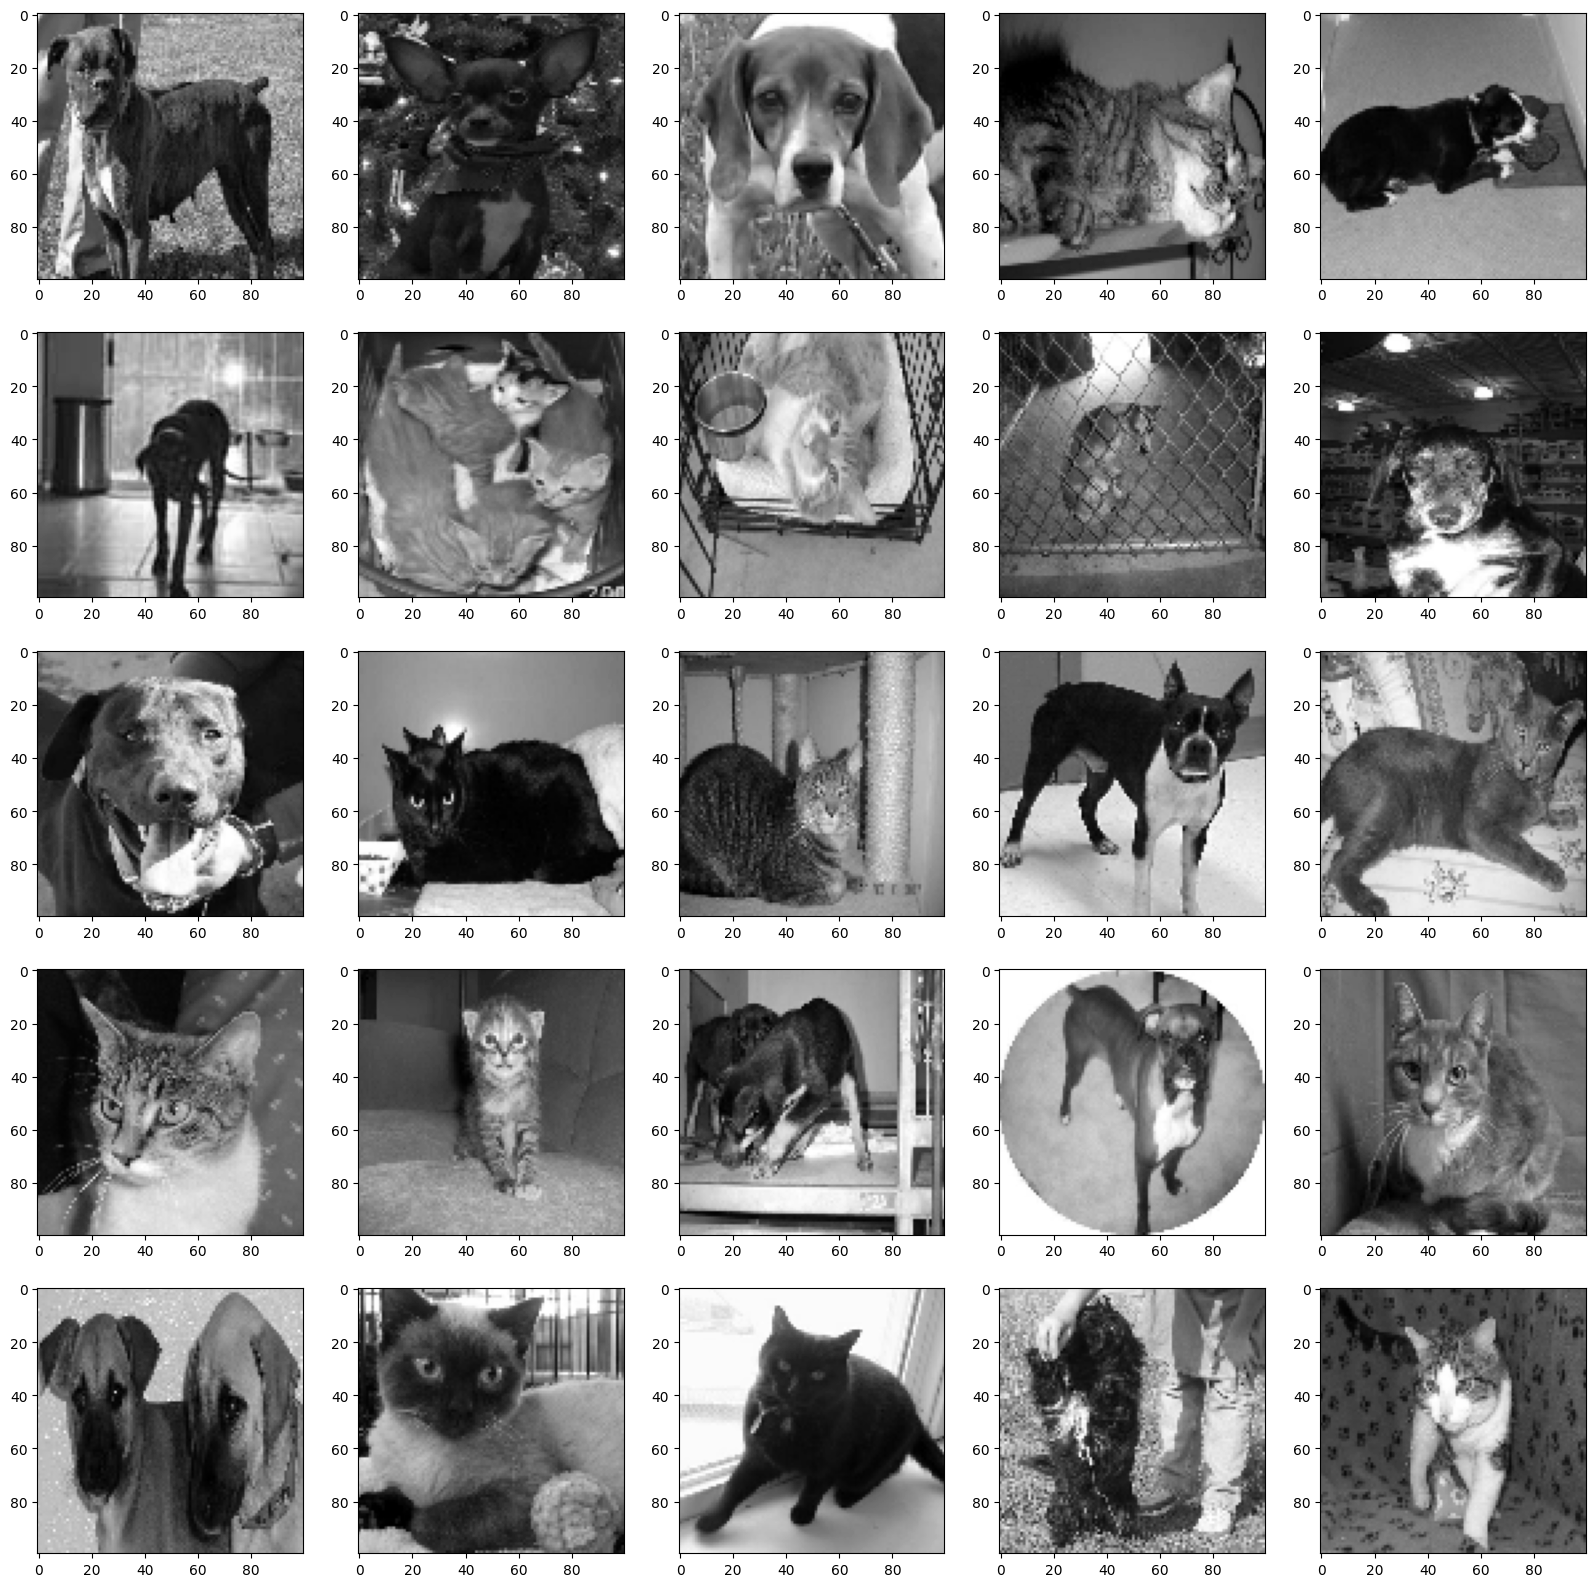

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG=100

for i, (imagen, etiqueta) in enumerate(datos["train"].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen= cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

In [ ]:
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos["train"]):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen= cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape (TAMANO_IMG, TAMANO_IMG, 1)
  datos_entrenamiento.append([imagen, etiqueta])

In [ ]:
datos_entrenamiento [0]

[array([[[249],
         [190],
         [105],
         ...,
         [189],
         [196],
         [143]],
 
        [[232],
         [127],
         [ 88],
         ...,
         [187],
         [180],
         [186]],
 
        [[171],
         [ 87],
         [ 83],
         ...,
         [129],
         [158],
         [166]],
 
        ...,
 
        [[113],
         [173],
         [162],
         ...,
         [143],
         [156],
         [119]],
 
        [[140],
         [152],
         [171],
         ...,
         [ 98],
         [155],
         [154]],
 
        [[ 91],
         [109],
         [167],
         ...,
         [ 46],
         [ 51],
         [ 47]]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [ ]:
X = []
y = []

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
import numpy as np

x = np.array(X).astype(float) / 255

In [ ]:
 y = np.array(y)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [ ]:
modelo.fit(
    x, y, batch_size=32, validation_split=0.15, epochs=50
)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.5501 - loss: 0.6816 - val_accuracy: 0.6158 - val_loss: 0.6835
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7129 - loss: 0.5561 - val_accuracy: 0.7493 - val_loss: 0.5043
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7748 - loss: 0.4732 - val_accuracy: 0.7968 - val_loss: 0.4408
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8052 - loss: 0.4164 - val_accuracy: 0.7857 - val_loss: 0.4403
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8361 - loss: 0.3691 - val_accuracy: 0.8106 - val_loss: 0.4011
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8567 - loss: 0.3326 - val_accuracy: 0.8206 - val_loss: 0.3983
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8827 - loss: 0.2810 - val_accuracy: 0.8292 - val_loss: 0.3904
Epoch 8/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9006 - loss: 0.2477 - v

In [ ]:
!unzip /archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/images/Sphynx_9.jpg  
  inflating: images/images/Sphynx_90.jpg  
  inflating: images/images/Sphynx_91.jpg  
  inflating: images/images/Sphynx_92.jpg  
  inflating: images/images/Sphynx_93.jpg  
  inflating: images/images/Sphynx_94.jpg  
  inflating: images/images/Sphynx_95.jpg  
  inflating: images/images/Sphynx_96.jpg  
  inflating: images/images/Sphynx_98.jpg  
  inflating: images/images/Sphynx_99.jpg  
  inflating: images/images/american_bulldog_10.jpg  
  inflating: images/images/american_bulldog_100.jpg  
  inflating: images/images/american_bulldog_101.jpg  
  inflating: images/images/american_bulldog_102.jpg  
  inflating: images/images/american_bulldog_103.jpg  
  inflating: images/images/american_bulldog_104.jpg  
  inflating: images/images/american_bulldog_105.jpg  
  inflating: images/images/american_bulldog_106.jpg  
  inflating: images/images/american_bulldog_107.jpg  
  inflating: images/images/american

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


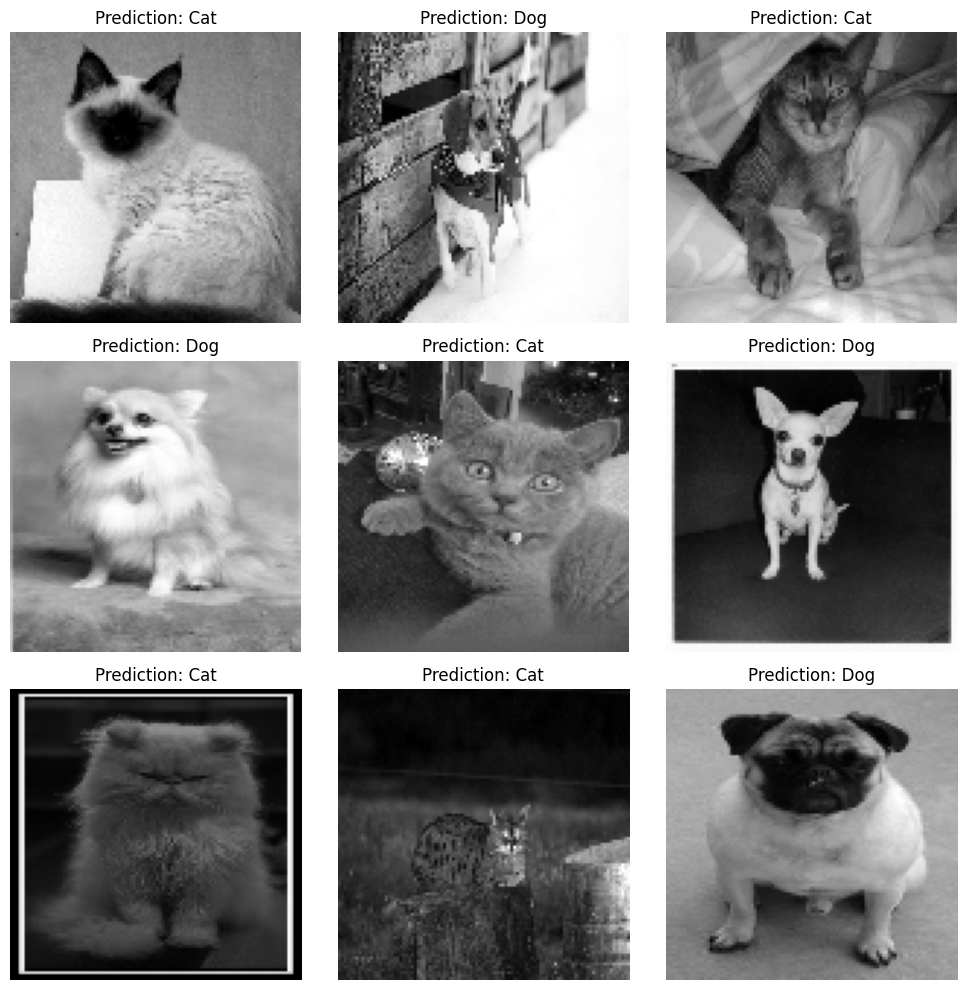

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#predicciones a imagenes diferentes a las procesadas previamente seleccionadas aleatoriamente usando otro banco de imagenes
# url: https://www.kaggle.com/datasets/zippyz/cats-and-dogs-breeds-classification-oxford-dataset/data
image_paths = ["/content/images/images/Birman_53.jpg",
               "/content/images/images/beagle_89.jpg",
               "/content/images/images/Abyssinian_161.jpg",
               "/content/images/images/pomeranian_169.jpg",
               "/content/images/images/British_Shorthair_30.jpg",
               "/content/images/images/chihuahua_64.jpg",
               "/content/images/images/Persian_47.jpg",
               "/content/images/images/Bengal_36.jpg",
               "/content/images/images/pug_126.jpg",
               ]

images = []

for path in image_paths:
    image = cv2.imread(path)
    image = cv2.resize(image, (100, 100))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(float) / 255.0
    image = np.reshape(image, (100, 100, 1))
    images.append(image)

images = np.array(images)

predictions = modelo.predict(images)

plt.figure(figsize=(10, 10))

for i, (image, prediction) in enumerate(zip(images, predictions)):
    label = "Dog" if prediction > 0.5 else "Cat"

    plt.subplot(3, 3, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Prediction: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

